# IPL Match Result Analysis & Prediction using ML

In [564]:
##importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [565]:
##loading the csv files into dataframes
match_df = pd.read_csv("data/matches.csv")
dlvr_df = pd.read_csv("data/deliveries.csv")
match_df.sample(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
191,192,2010,Bangalore,2010-03-23,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,field,normal,0,Royal Challengers Bangalore,36,0,RV Uthappa,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,NaN
247,248,2011,Chennai,2011-04-16,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,21,0,MEK Hussey,"MA Chidambaram Stadium, Chepauk",HDPK Dharmasena,AL Hill,NaN
665,7923,2018,Pune,30/04/18,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,normal,0,Chennai Super Kings,13,0,SR Watson,Maharashtra Cricket Association Stadium,C Shamshuddin,Anil Dandekar,O Nandan
54,55,2017,Delhi,2017-05-14,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,10,0,HV Patel,Feroz Shah Kotla,CK Nandan,C Shamshuddin,NaN
640,7898,2018,Chennai,10/04/18,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk",Anil Chaudhary,Chris Gaffaney,A Nanda Kishore
283,284,2011,Chandigarh,2011-05-08,Kings XI Punjab,Pune Warriors,Kings XI Punjab,bat,normal,0,Pune Warriors,0,5,R Sharma,"Punjab Cricket Association Stadium, Mohali",SK Tarapore,RJ Tucker,NaN
543,544,2015,Chandigarh,2015-04-27,Sunrisers Hyderabad,Kings XI Punjab,Kings XI Punjab,field,normal,0,Sunrisers Hyderabad,20,0,TA Boult,"Punjab Cricket Association Stadium, Mohali",HDPK Dharmasena,CB Gaffaney,NaN
746,11342,2019,Mumbai,02/05/19,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore
56,57,2017,Bangalore,2017-05-17,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,NaN
515,516,2014,Mumbai,2014-05-30,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Kings XI Punjab,24,0,V Sehwag,Wankhede Stadium,HDPK Dharmasena,RJ Tucker,NaN


In [566]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [567]:
dlvr_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [568]:
dlvr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## Initial Exploration
* Finding missing values


In [569]:
match_df['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [570]:
match_df[match_df['winner'].isnull() == True]


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [571]:
match_df['winner'].fillna('Draw', inplace=True)

In [572]:
match_df[match_df['winner'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [573]:
match_df.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors', 'Delhi Capitals']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW', 'DC'],inplace=True)

team_encode_dict = {'team1': {'MI':1,'KKR':2,'RCB':3,'DCH':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13, 'DC':14},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DCH':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13, 'DC':14},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DCH':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13, 'DC':14},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DCH':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13, 'DC': 14, 'Draw': 15}}
match_df.replace(team_encode_dict, inplace=True)
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [574]:
team_encodings = {'MI':1,
                  'KKR':2,
                  'RCB':3,
                  'DCH':4,
                  'CSK':5,
                  'RR':6,
                  'DD':7,
                  'GL':8,
                  'KXIP':9,
                  'SRH':10,
                  'RPS':11,
                  'KTK':12,
                  'PW':13,
                  'DC':14
                 }


### City Column

In [575]:
match_df[match_df['city'].isnull() == True ]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [576]:
match_df['city'].fillna('Dubai',inplace=True)
match_df.describe()

,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,6.123016,6.027778,6.031746,0.025132,5.800265,13.283069,3.350529
std,3464.478148,3.366895,3.884689,3.786770,3.873708,0.156630,3.783344,23.471144,3.387963
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,189.750000,2011.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000
50%,378.500000,2013.000000,6.000000,6.000000,6.000000,0.000000,5.000000,0.000000,4.000000
75%,567.250000,2016.000000,9.000000,9.000000,9.000000,0.000000,9.000000,19.000000,6.000000
max,11415.000000,2019.000000,14.000000,14.000000,14.000000,1.000000,15.000000,146.000000,10.000000


In [577]:
match_df = match_df[['id', 'team1','team2','city','toss_decision','toss_winner','venue','winner']]
match_df.head()

,id,team1,team2,city,toss_decision,toss_winner,venue,winner
0,1,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,2,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,3,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,4,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,5,3,7,Bangalore,bat,3,M Chinnaswamy Stadium,3


In [578]:
match_df.describe()

,id,team1,team2,toss_winner,winner
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,6.123016,6.027778,6.031746,5.800265
std,3464.478148,3.884689,3.786770,3.873708,3.783344
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,189.750000,3.000000,3.000000,2.000000,2.000000
50%,378.500000,6.000000,6.000000,6.000000,5.000000
75%,567.250000,9.000000,9.000000,9.000000,9.000000
max,11415.000000,14.000000,14.000000,14.000000,15.000000


In [579]:
toss_wins = match_df['winner'].value_counts(sort=True)
match_wins = match_df['winner'].value_counts(sort=True)

for idx, val in toss_wins.iteritems():
    print(idx)
    print(f"{list(team_encode_dict['winner'].keys())[idx-1]} -> {toss_wins[idx]}")


1
MI -> 109
5
CSK -> 100
2
KKR -> 92
3
RCB -> 84
9
KXIP -> 82
6
RR -> 75
7
DD -> 67
10
SRH -> 58
14
DC -> 39
11
RPS -> 15
8
GL -> 13
13
PW -> 12
12
KTK -> 6
15
Draw -> 4


In [580]:
team_encode_dict['team1']['MI']

1

<AxesSubplot:>

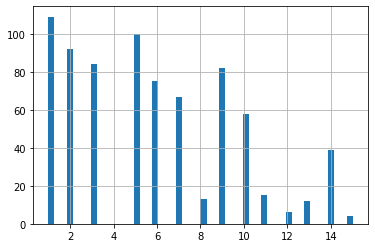

In [581]:
match_df['winner'].hist(bins=50)

In [582]:
match_df['winner'].value_counts()

1     109
5     100
2      92
3      84
9      82
6      75
7      67
10     58
14     39
11     15
8      13
13     12
12      6
15      4
Name: winner, dtype: int64

Text(0.5, 1.0, 'Match winners')

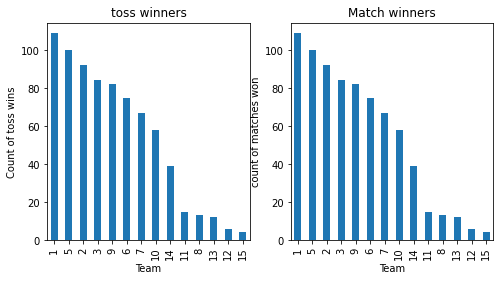

In [583]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
toss_wins.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

In [584]:
match_df.isnull().sum()

id               0
team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

## Encoding all the remaining features

* city
* toss_decision
* venue

In [585]:
##using the label encoder
from sklearn.preprocessing import LabelEncoder

ftr_list = ['city', 'toss_decision', 'venue']
encoder = LabelEncoder()
for ftr in ftr_list:
    match_df[ftr] = encoder.fit_transform(match_df[ftr])
    print(encoder.classes_)

match_df

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bengaluru' 'Bloemfontein'
 'Cape Town' 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi'
 'Dharamsala' 'Dubai' 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur'
 'Johannesburg' 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata' 'Mohali' 'Mumbai'
 'Nagpur' 'Port Elizabeth' 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah'
 'Visakhapatnam']
['bat' 'field']
['ACA-VDCA Stadium' 'Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Feroz Shah Kotla Ground' 'Green Park'
 'Himachal Pradesh Cricket Association Stadium' 'Holkar Cricket Stadium'
 'IS Bindra Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M. A. Chidambaram Stadium'
 'M. Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New 

,id,team1,team2,city,toss_decision,toss_winner,venue,winner
0,1,10,3,15,1,3,28,10
1,2,1,11,27,1,11,21,11
2,3,8,2,29,1,2,31,2
3,4,11,9,16,1,9,13,9
4,5,3,7,2,0,3,17,3
...,...,...,...,...,...,...,...,...
751,11347,2,1,24,1,1,40,1
752,11412,5,1,8,0,5,18,1
753,11413,10,14,32,1,14,0,14
754,11414,14,5,32,1,5,0,5


In [586]:
match_df = match_df[match_df['winner'] != 15]

## Machine Learning

In [587]:
##splitting the data for training and testing

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(match_df, test_size=0.2, random_state=42)
print(train.shape)
print(test.shape)

(604, 7)
(152, 7)


In [588]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np


def print_model_scores(model, data, predictors, target):
    '''
    A generic function to generate the performance report of the
    model in question on the data passed to it using cross-validation
    
    Args:
        model: ML Model to be checked
        data: 
    
    '''
    model.fit(data[predictors], data[target])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[target])
    print('Accuracy : %s' % '{0:.2%}'.format(accuracy))
    scores = cross_val_score(model, data[predictors], data[target], scoring="neg_mean_squared_error", cv=5)
    print('Cross-Validation Score :{}'.format(np.sqrt(-scores)))
    print(f"Average RMSE: {np.sqrt(-scores).mean()}")

In [589]:
target_var=['winner']
predictor_var = ['team1','team2','toss_winner']
model = LogisticRegression()
print_model_scores(model, train_df, predictor_var, target_var)

Accuracy : 26.12%
Cross-Validation Score :[3.78884836 3.60555128 3.50832344 3.51662717 3.44359308]
Average RMSE: 3.5725886658390733


In [590]:
model = RandomForestClassifier(n_estimators=100)
target_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','city','toss_decision']
print_model_scores(model, match_df,predictor_var,outcome_var)

Accuracy : 88.16%
Cross-Validation Score :[3.72213711 4.33833978 4.0116497  3.60555128 3.64234357]
Average RMSE: 3.864004286459655


In [591]:
team1='RCB'
team2='KKR'
toss_winner='RCB'
inp = [team_encode_dict['team1'][team1],team_encode_dict['team2'][team2],'14',team_encode_dict['toss_winner'][toss_winner],'2','1']
inp = np.array(inp).reshape((1, -1))
print(inp)
output=model.predict(inp)
print(f"The winner would be: {list(dicVal.keys())[list(team_encode_dict['team1'].values()).index(output)]}")

[['3' '2' '14' '3' '2' '1']]
The winner would be: KKR


In [592]:
pd.Series(index= predictor_var, data=model.feature_importances_)

team1            0.226061
team2            0.252487
venue            0.174925
toss_winner      0.161406
city             0.155158
toss_decision    0.029961
dtype: float64

In [593]:
match_df[match_df['winner'] == match_df['toss_winner']]

,id,team1,team2,city,toss_decision,toss_winner,venue,winner
1,2,1,11,27,1,11,21,11
2,3,8,2,29,1,2,31,2
3,4,11,9,16,1,9,13,9
4,5,3,7,2,0,3,17,3
5,6,8,10,15,1,10,28,10
...,...,...,...,...,...,...,...,...
750,11346,5,9,23,1,9,14,9
751,11347,2,1,24,1,1,40,1
753,11413,10,14,32,1,14,0,14
754,11414,14,5,32,1,5,0,5


In [594]:
print_model_scores(model, test_df, predictor_var, target_var)

Accuracy : 95.36%
Cross-Validation Score :[5.39713185 4.62961481 4.19920627 4.19523539 4.0538048 ]
Average RMSE: 4.494998626723444


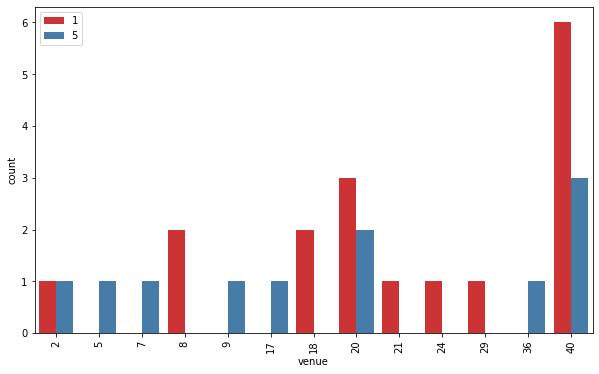

In [595]:
import seaborn as sns
team1=team_encodings['MI']
team2=team_encodings['CSK']
mtemp=match_df[((match_df['team1']==team1)|(match_df['team2']==team1))&((match_df['team1']==team2)|(match_df['team2']==team2))]
sns.countplot(x='venue', hue='winner',data=mtemp, palette='Set1')
plt.xticks(rotation='vertical')
leg = plt.legend( loc = 'upper left')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

## Predicting winners with teams

In [596]:
batsman_grp = dlvr_df.groupby(['match_id', 'batting_team'])
batsmen = batsman_grp['batsman_runs'].sum().reset_index()
batsmen

,match_id,batting_team,batsman_runs
0,1,Royal Challengers Bangalore,166
1,1,Sunrisers Hyderabad,200
2,2,Mumbai Indians,176
3,2,Rising Pune Supergiant,183
4,3,Gujarat Lions,179
...,...,...,...
1505,11413,Sunrisers Hyderabad,162
1506,11414,Chennai Super Kings,151
1507,11414,Delhi Capitals,147
1508,11415,Chennai Super Kings,148


In [597]:
match = pd.read_csv("data/matches.csv")
match = match[match['winner'].isnull() != True]
teams = match.groupby(['id', 'team1', 'team2'])['winner'].sum().reset_index()
teams['id']

0          1
1          2
2          3
3          4
4          5
       ...  
747    11347
748    11412
749    11413
750    11414
751    11415
Name: id, Length: 752, dtype: int64

In [598]:
teams

,id,team1,team2,winner
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad
1,2,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant
2,3,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders
3,4,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab
4,5,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore
...,...,...,...,...
747,11347,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians
748,11412,Chennai Super Kings,Mumbai Indians,Mumbai Indians
749,11413,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals
750,11414,Delhi Capitals,Chennai Super Kings,Chennai Super Kings


In [599]:
# teams = teams[teams['id']!= [301]]
# batsmen = batsmen[batsmen['match_id'] != [301, 545]]

In [600]:
append_dict = {'match_id': list(teams['id']),
              'team1': list(teams['team2']),
              'team2': list(teams['team1']),
              'team1_score': [],
              'team2_score': [],
               'winner': list(teams['winner'])
              }

for match_id, team in zip(list(teams['id']), list(teams['team1'])):
    append_dict['team1_score'].append(int(batsmen.query('match_id == @match_id and batting_team == @team')['batsman_runs']))

for match_id, team in zip(list(teams['id']), list(teams['team2'])):
    append_dict['team2_score'].append(int(batsmen.query('match_id == @match_id and batting_team == @team')['batsman_runs']))
  
df = pd.DataFrame(append_dict)
    

In [601]:
df

,match_id,team1,team2,team1_score,team2_score,winner
0,1,Royal Challengers Bangalore,Sunrisers Hyderabad,200,166,Sunrisers Hyderabad
1,2,Rising Pune Supergiant,Mumbai Indians,176,183,Rising Pune Supergiant
2,3,Kolkata Knight Riders,Gujarat Lions,179,169,Kolkata Knight Riders
3,4,Kings XI Punjab,Rising Pune Supergiant,157,154,Kings XI Punjab
4,5,Delhi Daredevils,Royal Challengers Bangalore,151,137,Royal Challengers Bangalore
...,...,...,...,...,...,...
747,11347,Mumbai Indians,Kolkata Knight Riders,133,134,Mumbai Indians
748,11412,Mumbai Indians,Chennai Super Kings,131,132,Mumbai Indians
749,11413,Delhi Capitals,Sunrisers Hyderabad,162,165,Delhi Capitals
750,11414,Chennai Super Kings,Delhi Capitals,147,151,Chennai Super Kings


In [602]:
df.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors', 'Delhi Capitals']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW', 'DC'],inplace=True)

team_encode_dict = {'team1': {'MI':1,'KKR':2,'RCB':3,'DCH':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13, 'DC':14},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DCH':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13, 'DC':14},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DCH':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13, 'DC':14},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DCH':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13, 'DC': 14, 'Draw':15}}
df.replace(team_encode_dict, inplace=True)
df.head()

,match_id,team1,team2,team1_score,team2_score,winner
0,1,3,10,200,166,10
1,2,11,1,176,183,11
2,3,2,8,179,169,2
3,4,9,11,157,154,9
4,5,7,3,151,137,3


In [613]:
cols_to_use = match_df.columns.difference(df.columns)
cols_to_use

Index(['city', 'id', 'toss_decision', 'toss_winner', 'venue'], dtype='object')

In [614]:
pd.merge(df, match_df[cols_to_use], left_on='match_id', right_on='id', how='outer')

,match_id,team1,team2,team1_score,team2_score,winner,city,id,toss_decision,toss_winner,venue
0,1,3,10,200,166,10,15,1,1,3,28
1,2,11,1,176,183,11,27,2,1,11,21
2,3,2,8,179,169,2,29,3,1,2,31
3,4,9,11,157,154,9,16,4,1,9,13
4,5,7,3,151,137,3,2,5,0,3,17
...,...,...,...,...,...,...,...,...,...,...,...
747,11347,1,2,133,134,1,24,11347,1,1,40
748,11412,1,5,131,132,1,8,11412,0,5,18
749,11413,14,10,162,165,14,32,11413,1,14,0
750,11414,5,14,147,151,5,32,11414,1,5,0
